In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Loading the dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/Mall_Customers.csv")

Displaying the first five rows in the dataset

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Displaying the last five rows in the dataset

In [ ]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
df.isna()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [ ]:
df.shape

(200, 5)

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
df.drop('CustomerID', axis=1,inplace=True)

In [ ]:
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
5,Female,22,17,76
6,Female,35,18,6
7,Female,23,18,94
8,Male,64,19,3
9,Female,30,19,72


Now find Unique categorical Values

In [ ]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)


Convert the categorical values to numerical values for ML prediction

In [ ]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
5,0,22,17,76
6,0,35,18,6
7,0,23,18,94
8,1,64,19,3
9,0,30,19,72



Check to see if the transformation has happenned

In [ ]:
df['Gender'].unique()

array([1, 0])

Check to see if there are any Null Values, If yes then you need to fill them or remove them based on the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB



As there are no null values check to see is there any duplicates

In [ ]:
df.duplicated().sum()

0

Let us describe the dataset and transpose it for easy visualisation

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gender,200.0,0.44,0.497633,0.0,0.00,0.0,1.0,1.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


Remove the Outliers

In [ ]:
from scipy import stats
import numpy as np
numerical_cols = ['Gender','Age','Annual Income (k$)','Spending Score (1-100)']
z_scores = np.abs(stats.zscore(df[numerical_cols]))
threshold = 3
outliers = (z_scores > threshold).any(axis=1)
df_no_outliers = df[~outliers]

In [ ]:
df_no_outliers.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gender,200.0,0.44,0.497633,0.0,0.00,0.0,1.0,1.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [ ]:
df_no_outliers.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


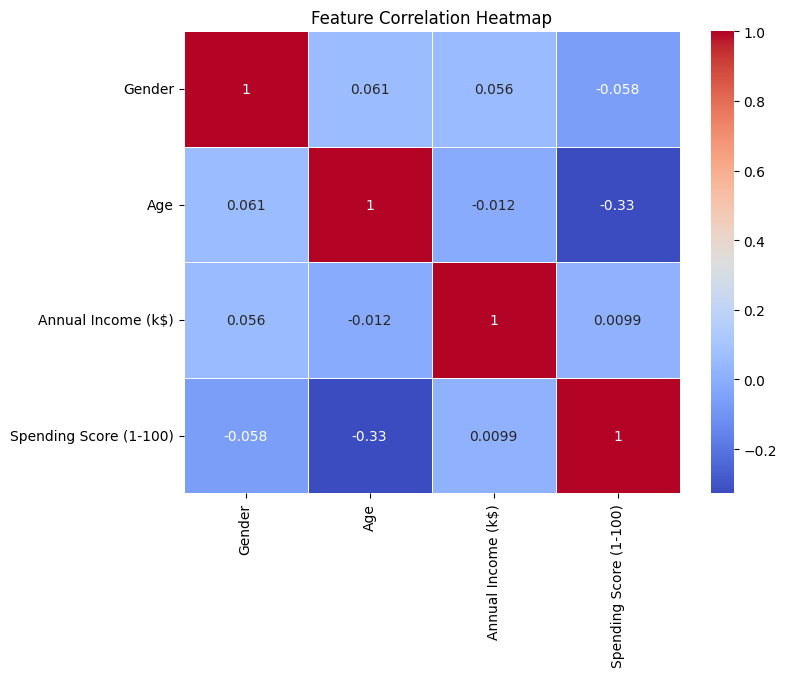

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5) # Remove the drop statement
plt.title("Feature Correlation Heatmap")
plt.show()

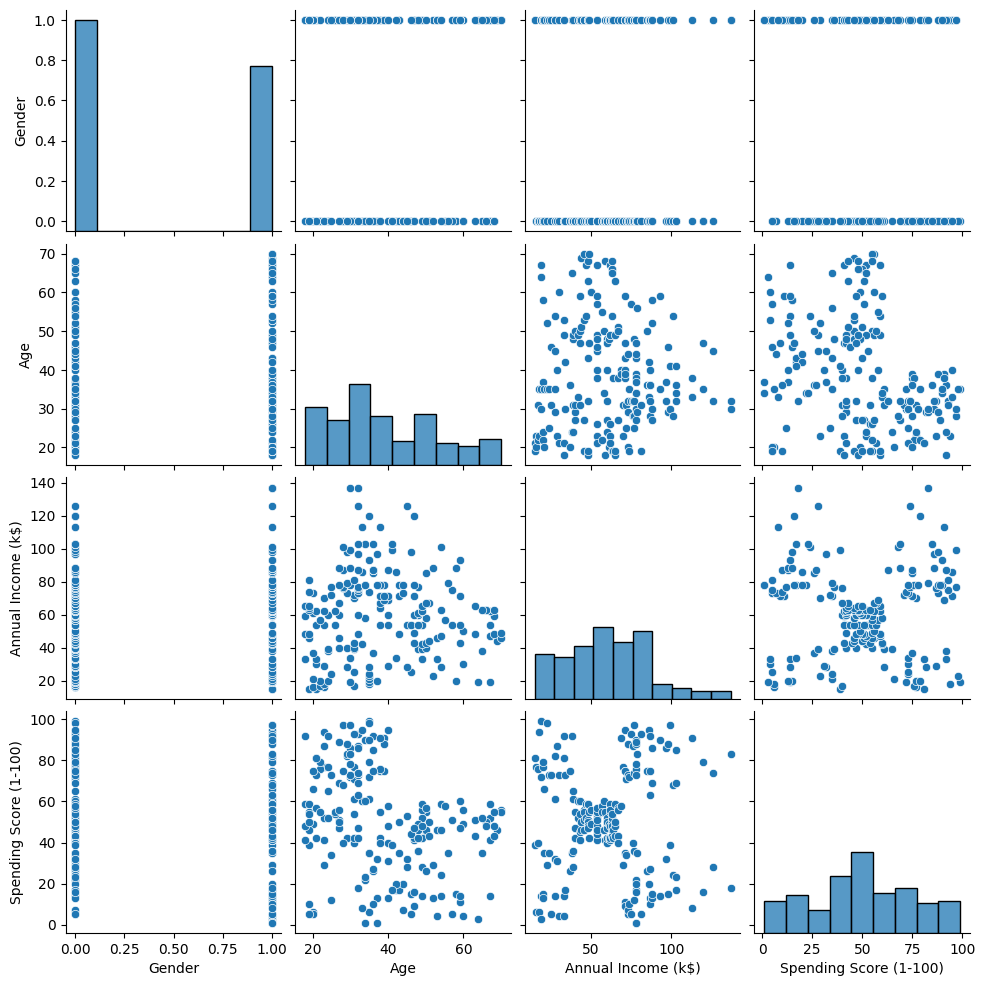

In [ ]:
sns.pairplot(df)
plt.show()

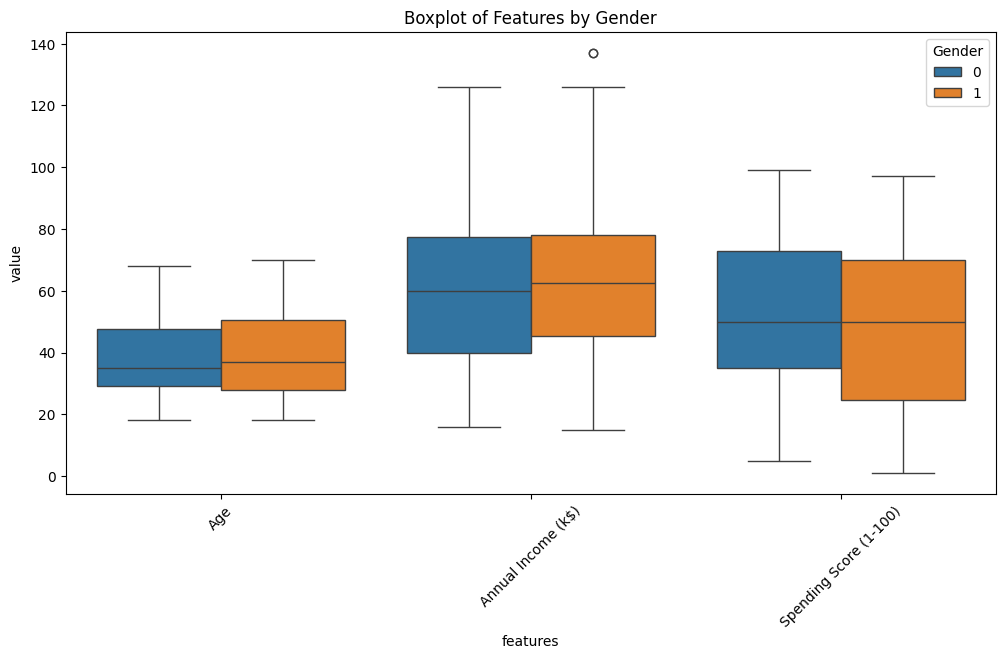

In [ ]:
plt.figure(figsize=(12,6))
df_melted = df.melt(id_vars=["Gender"], var_name="features", value_name="value")
sns.boxplot(x="features", y="value", hue="Gender", data=df_melted)
plt.xticks(rotation=45)
plt.title("Boxplot of Features by Gender")
plt.show()

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
labels = kmeans.labels_
df['Cluster'] = labels

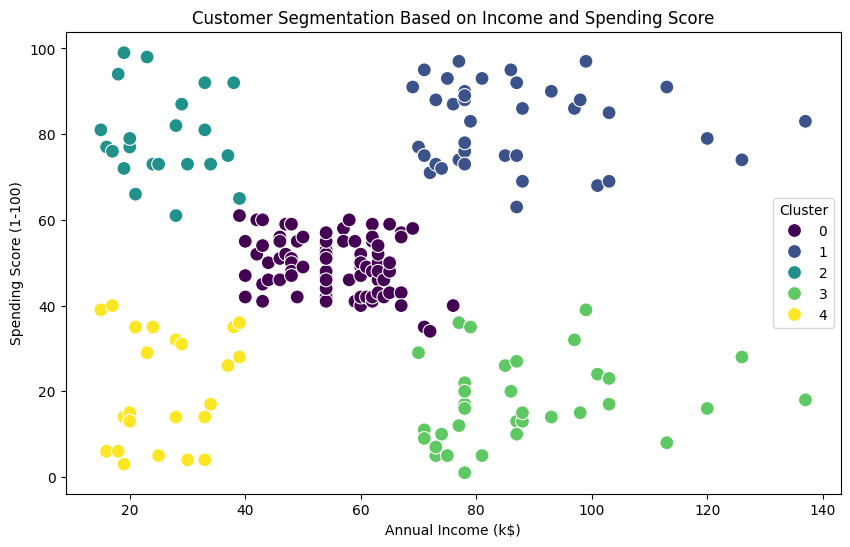

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='viridis', s=100)
plt.title("Customer Segmentation Based on Income and Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
X = df.drop(columns=['Gender'])
y = df['Gender']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

In [ ]:
cluster_labels = kmeans.labels_
print(cluster_labels)

[2 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0
 4 0 0 0 4 0 0 0 0 4 0 4 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.5166666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.61      0.60        36
           1       0.39      0.38      0.38        24

    accuracy                           0.52        60
   macro avg       0.49      0.49      0.49        60
weighted avg       0.51      0.52      0.51        60


Confusion Matrix:
 [[22 14]
 [15  9]]
